#Step 1: Data Collection



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


i. Import necessary modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

ii. Import datasets

In [ ]:
df = pd.read_csv("Dataset of Diabetes .csv")
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


#Step 2: Data preprocessing

Exploratory Data Analysis(EDA)

**Check data types for each column:**

In [ ]:
print(df.dtypes)

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object


 **Check null values:**

In [ ]:
print(df.isnull().any())

ID           False
No_Pation    False
Gender       False
AGE          False
Urea         False
Cr           False
HbA1c        False
Chol         False
TG           False
HDL          False
LDL          False
VLDL         False
BMI          False
CLASS        False
dtype: bool


As we can see here, there is no null values in all the columns

In [ ]:
print(df.describe())

                ID     No_Pation          AGE         Urea           Cr  \
count  1000.000000  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean    340.500000  2.705514e+05    53.528000     5.124743    68.943000   
std     240.397673  3.380758e+06     8.799241     2.935165    59.984747   
min       1.000000  1.230000e+02    20.000000     0.500000     6.000000   
25%     125.750000  2.406375e+04    51.000000     3.700000    48.000000   
50%     300.500000  3.439550e+04    55.000000     4.600000    60.000000   
75%     550.250000  4.538425e+04    59.000000     5.700000    73.000000   
max     800.000000  7.543566e+07    79.000000    38.900000   800.000000   

             HbA1c         Chol           TG          HDL          LDL  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      8.281160     4.862820     2.349610     1.204750     2.609790   
std       2.534003     1.301738     1.401176     0.660414     1.115102   
min       0.900000     0.000

we can see there are multiple columns have outliers based on the mean and 3rd quartile:
i. Urea
ii. Cr
iii. Chol
iv. TG

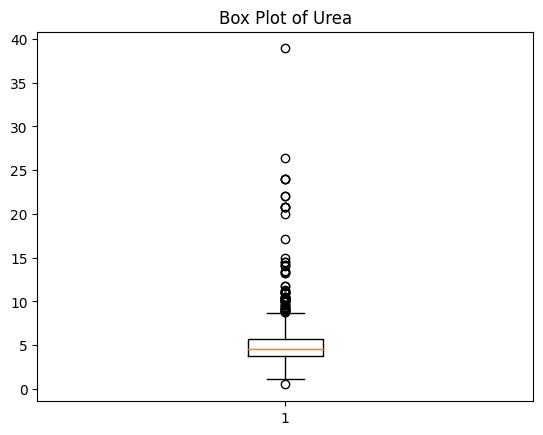

In [ ]:
plt.boxplot(df["Urea"])
plt.title("Box Plot of Urea")
plt.show()

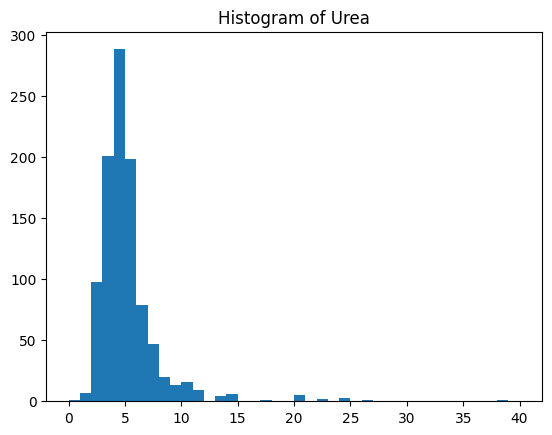

In [ ]:
plt.hist(df["Urea"],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])
plt.title("Histogram of Urea")
plt.show()

As we can see from the histogram almost 950 persons hava urea mostly under 15. but first lets check how many are the outlier first.

In [ ]:
num = (df["Urea"]>10).sum()
print("number of outliers: {}".format(num))

number of outliers: 45


after checking, Urea>11 is the outlier so let's check by dropping those values

In [ ]:
df = df.drop(df[df["Urea"] > 11].index)
print(df.describe())

               ID     No_Pation         AGE        Urea          Cr  \
count  971.000000  9.710000e+02  971.000000  971.000000  971.000000   
mean   343.876416  2.772453e+05   53.466529    4.753597   62.915551   
std    240.681685  3.430670e+06    8.786920    1.723688   28.797248   
min      2.000000  1.230000e+02   20.000000    0.500000    6.000000   
25%    127.000000  2.406350e+04   51.000000    3.600000   48.000000   
50%    306.000000  3.439500e+04   55.000000    4.500000   59.000000   
75%    556.500000  4.538350e+04   59.000000    5.600000   72.000000   
max    800.000000  7.543566e+07   79.000000   11.000000  370.000000   

            HbA1c        Chol          TG         HDL         LDL        VLDL  \
count  971.000000  971.000000  971.000000  971.000000  971.000000  971.000000   
mean     8.287497    4.863769    2.339763    1.208805    2.607096    1.874253   
std      2.556081    1.299998    1.396150    0.666903    1.119879    3.714749   
min      0.900000    0.000000    0.3

So we can see, Urea has become normal. So let's fix Cr.

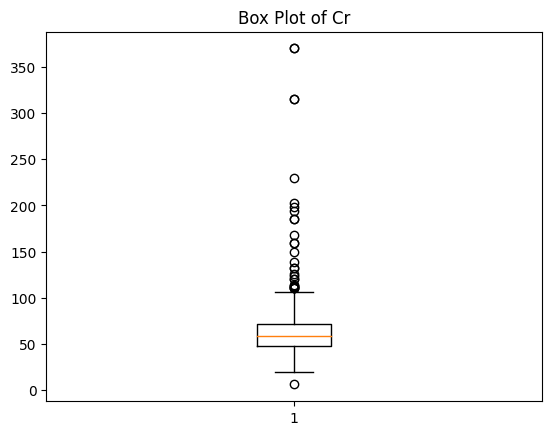

In [ ]:
plt.boxplot(df["Cr"])
plt.title("Box Plot of Cr")
plt.show()

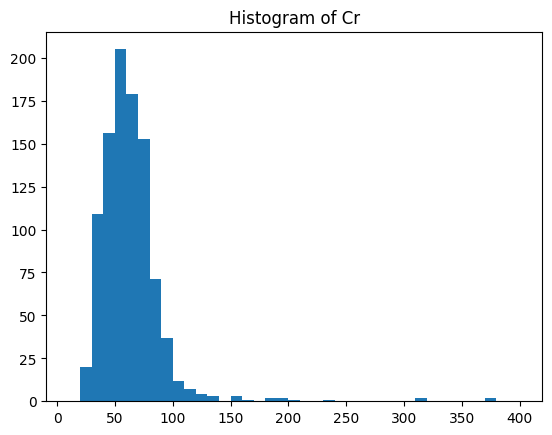

In [ ]:
plt.hist(df["Cr"],[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400])
plt.title("Histogram of Cr")
plt.show()

As we can see here, value >110 are the outliers. so first lets check the number of the outliers.

In [ ]:
num = (df["Cr"]>110).sum()
print("number of outliers: {}".format(num))

number of outliers: 28


In [ ]:
df = df.drop(df[df["Cr"] > 110].index)
print(df.describe())

               ID     No_Pation         AGE       Urea          Cr  \
count  943.000000  9.430000e+02  943.000000  943.00000  943.000000   
mean   345.024390  2.834226e+05   53.402969    4.63504   59.610817   
std    241.202218  3.481044e+06    8.779613    1.56746   17.305920   
min      2.000000  1.230000e+02   20.000000    0.50000    6.000000   
25%    125.000000  2.405650e+04   51.000000    3.60000   47.000000   
50%    309.000000  3.438900e+04   55.000000    4.50000   59.000000   
75%    559.500000  4.537650e+04   59.000000    5.50000   72.000000   
max    800.000000  7.543566e+07   79.000000   11.00000  106.000000   

            HbA1c        Chol          TG         HDL         LDL        VLDL  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean     8.296458    4.867572    2.328643    1.208006    2.612291    1.889396   
std      2.574133    1.303733    1.392533    0.670149    1.125737    3.763273   
min      0.900000    0.000000    0.300000    

<function matplotlib.pyplot.show(close=None, block=None)>

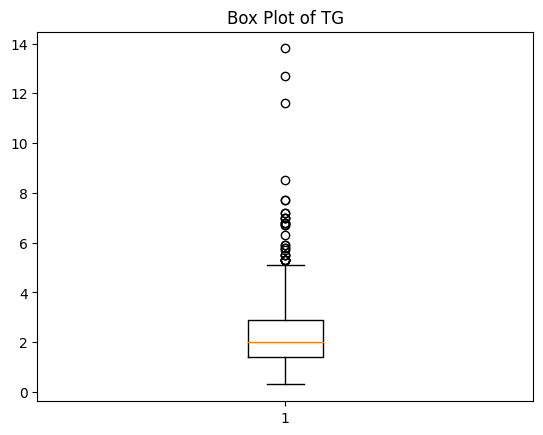

In [ ]:
plt.boxplot(df["TG"])
plt.title("Box Plot of TG")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

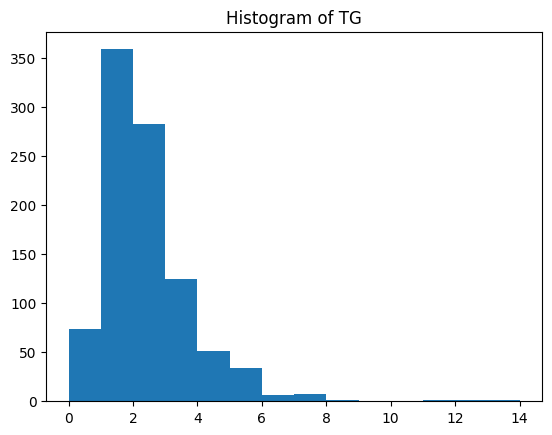

In [ ]:
plt.hist(df["TG"],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
plt.title("Histogram of TG")
plt.show

We can tg>6 are the outliers

In [ ]:
num = (df["TG"]>6).sum()
print("number of outliers: {}".format(num))

number of outliers: 17


In [ ]:
df = df.drop(df[df["TG"] > 6].index)
print(df.describe())

               ID     No_Pation         AGE        Urea          Cr  \
count  926.000000  9.260000e+02  926.000000  926.000000  926.000000   
mean   345.279698  2.872809e+05   53.313175    4.636548   59.531317   
std    240.754419  3.512694e+06    8.779410    1.571644   17.380778   
min      2.000000  1.230000e+02   20.000000    0.500000    6.000000   
25%    126.250000  2.405425e+04   51.000000    3.600000   47.000000   
50%    309.500000  3.438550e+04   55.000000    4.500000   59.000000   
75%    559.750000  4.537950e+04   59.000000    5.500000   71.750000   
max    800.000000  7.543566e+07   79.000000   11.000000  106.000000   

            HbA1c        Chol          TG         HDL         LDL        VLDL  \
count  926.000000  926.000000  926.000000  926.000000  926.000000  926.000000   
mean     8.250281    4.841058    2.222905    1.211933    2.623531    1.862419   
std      2.569988    1.283320    1.123955    0.673828    1.125734    3.788725   
min      0.900000    0.000000    0.3

<function matplotlib.pyplot.show(close=None, block=None)>

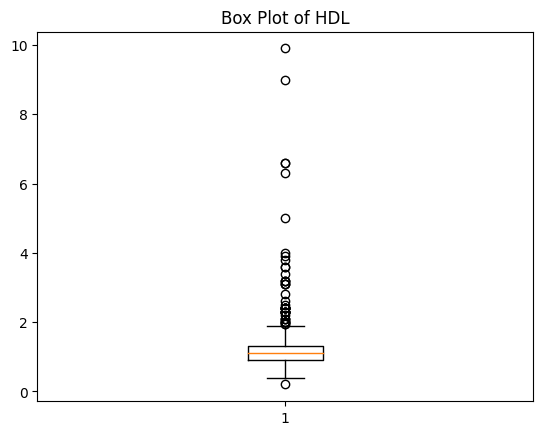

In [ ]:
plt.boxplot(df["HDL"])
plt.title("Box Plot of HDL")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

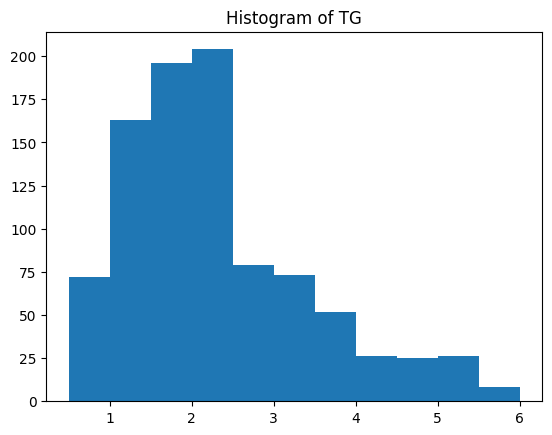

In [ ]:
plt.hist(df["TG"],[0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0])
plt.title("Histogram of TG")
plt.show

In [ ]:
num = (df["HDL"]>5.5).sum()
print("number of outliers: {}".format(num))

number of outliers: 5


In [ ]:
df = df.drop(df[df["HDL"] > 5.5].index)
print(df.describe())

               ID     No_Pation         AGE        Urea          Cr  \
count  921.000000  9.210000e+02  921.000000  921.000000  921.000000   
mean   345.216069  2.886528e+05   53.304017    4.631426   59.483170   
std    240.767676  3.522177e+06    8.799634    1.573416   17.374206   
min      2.000000  1.230000e+02   20.000000    0.500000    6.000000   
25%    126.000000  2.405300e+04   51.000000    3.600000   47.000000   
50%    310.000000  3.438600e+04   55.000000    4.500000   59.000000   
75%    560.000000  4.538000e+04   59.000000    5.500000   71.000000   
max    800.000000  7.543566e+07   79.000000   11.000000  106.000000   

            HbA1c        Chol          TG         HDL         LDL        VLDL  \
count  921.000000  921.000000  921.000000  921.000000  921.000000  921.000000   
mean     8.240782    4.832921    2.225635    1.176819    2.626048    1.866015   
std      2.570845    1.274083    1.124485    0.464814    1.125060    3.798671   
min      0.900000    0.000000    0.3

In [ ]:
print(df)

      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0    24.0     N  
1    23.0     N

In [ ]:
# Drop unnecessary columns
df = df.drop(['No_Pation'], axis=1)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(['CLASS'], axis=1)
y = df['CLASS']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           N       0.78      0.82      0.80        22
          N        1.00      0.00      0.00         1
           P       0.29      0.25      0.27         8
           Y       0.96      0.97      0.96       154

    accuracy                           0.91       185
   macro avg       0.76      0.51      0.51       185
weighted avg       0.91      0.91      0.91       185

